## Introduction to Pandas Library for Exploratory Data Analysis

*Topics*

1. **Preliminaries:**  load libraries and set styles
2. **Load Data:**  load data in Pandas dataframe object and verify data
3. **Quick Hits:**  answer some initial questions quickly
4. **Visualizations:**  learn to plot a variety of distributions using matplotlib and seaborn
5. **Insight & Discovery:**  are there interesting patterns in the data?


*Some initial questions for data analysis*

1. Has overall life expectancy (LE) increased from 1960 - 1913?
2. Which countries have shown the greatest gains in LE?
3. Which countries have shown th least gains in LE
4. Which countries are top ten and bottom ten by year
5. How do wars and other conflicts affect LE?

### 1. Preliminaries

In [2]:
# load libraries and set styles
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')
from ipywidgets import interact 

In [3]:
# inline plots
%matplotlib inline

### 2. Read and verify data

In [4]:
# read csv dataset
lexp = pd.read_csv('data/lexpectancy.csv')

In [5]:
# check first few lines
lexp.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
3,Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
4,Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [6]:
# verify data frame shape
lexp.shape

(248, 56)

In [7]:
# review dataframe info
lexp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 56 columns):
Country    248 non-null object
Code       248 non-null object
1960       222 non-null float64
1961       223 non-null float64
1962       223 non-null float64
1963       222 non-null float64
1964       222 non-null float64
1965       223 non-null float64
1966       223 non-null float64
1967       223 non-null float64
1968       223 non-null float64
1969       223 non-null float64
1970       224 non-null float64
1971       223 non-null float64
1972       223 non-null float64
1973       224 non-null float64
1974       223 non-null float64
1975       223 non-null float64
1976       223 non-null float64
1977       223 non-null float64
1978       225 non-null float64
1979       224 non-null float64
1980       225 non-null float64
1981       225 non-null float64
1982       229 non-null float64
1983       226 non-null float64
1984       226 non-null float64
1985       226 non-null float64
1

In [8]:
# set dataframe row index to country
lexp = lexp.set_index('Country')

### 3. Quick Hits

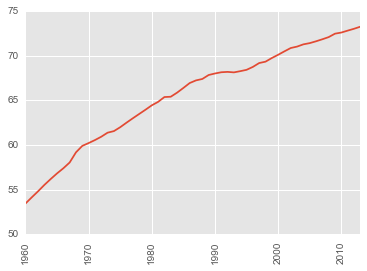

In [9]:
# Did life expectancy increase from 1960 to 2013
lexp.median().plot(rot=90)

In [10]:
# Identify highest and lowest LE in 1960
print(lexp['1960'].idxmax())
print(lexp['1960'].idxmin())

Norway
Mali


In [11]:
# calculate gain and attach to new column
lexp['gain'] = np.round((lexp['2013']-lexp['1960'])/lexp['1960'],2)

In [12]:
# verify dataframe
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,gain
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,0.15
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,0.86
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,0.57
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244,0.25


In [13]:
# create pandas series object with only gain column 
gain = lexp['gain']

In [14]:
# verify object type of gain
type(gain)

pandas.core.series.Series

In [16]:
gain.head()

Country
Aruba          0.15
Andorra         NaN
Afghanistan    0.86
Angola         0.57
Albania        0.25
Name: gain, dtype: float64

In [17]:
# drop missing values and order the series
sgain = gain.dropna().order(ascending=False)

In [18]:
# ten countries with the most gain
sgain.head(10)

Country
Bhutan         1.14
Maldives       1.06
Mali           1.04
Timor-Leste    1.00
Nepal          0.97
Gambia, The    0.87
Afghanistan    0.86
Yemen, Rep.    0.85
Oman           0.80
Tunisia        0.75
Name: gain, dtype: float64

In [19]:
# ten countries with the least gain
sgain.tail(10)

Country
Guyana                0.10
Slovak Republic       0.09
Zimbabwe              0.08
Russian Federation    0.08
Bulgaria              0.08
Belarus               0.07
Lesotho               0.06
Lithuania             0.06
Latvia                0.06
Ukraine               0.04
Name: gain, dtype: float64

In [20]:
# delete gain column from dataframe
del lexp['gain']

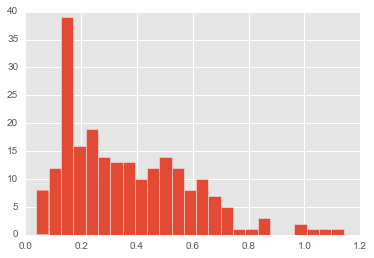

In [21]:
# let's plot a histogram distribution of gains
gain.hist(bins=25)

### 4. Plots of various distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e40b4e0>]], dtype=object)

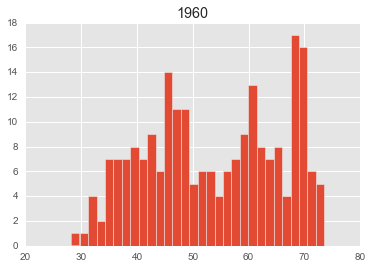

In [23]:
# histogram of LE for a particular year using standart matplotlib and pandas
lexp.hist(column='1960',bins=30)

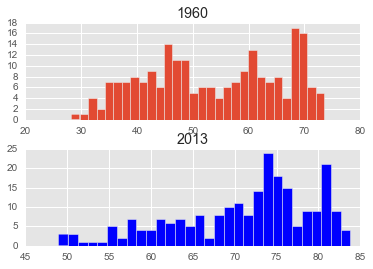

In [24]:
# compare distribution of beginning and end year
f, (ax1, ax2) = plt.subplots(2);
lexp.hist(column='1960',bins=30, ax=ax1);
lexp.hist(column='2013',bins=30, color='blue', ax=ax2);

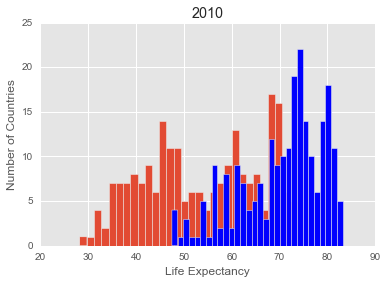

In [26]:
# compare two years in same frame
f, (ax1) = plt.subplots(1)
lexp.hist(column='1960',bins=30, ax=ax1);
lexp.hist(column='2010',bins=30, color='blue', ax=ax1);
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Countries')

In [28]:
# compare two years in same frame
def compare_plot(year1,year2):
    f, (ax1) = plt.subplots(1)
    lexp.hist(column=year1,bins=30, ax=ax1);
    lexp.hist(column=year2,bins=30, color='blue', ax=ax1);
    plt.xlabel('Life Expectancy')
    plt.ylabel('Number of Countries')

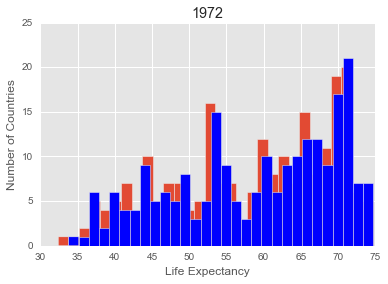

In [29]:
compare_plot('1970','1972')

In [33]:
years = [str(year) for year in range(1960,2014) if year%10==0]

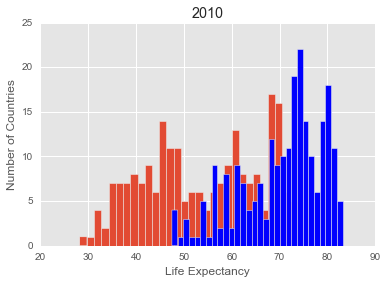

In [34]:
interact(compare_plot, year1=years,year2=years);

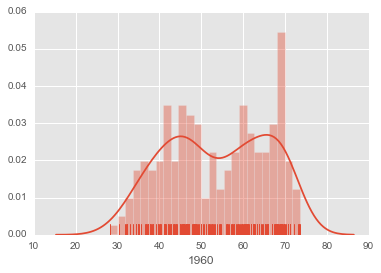

In [27]:
# use seaborn visualization library to plot distributions
sns.distplot(lexp['1960'].dropna(),hist=True, kde=True, rug=True, bins=25);

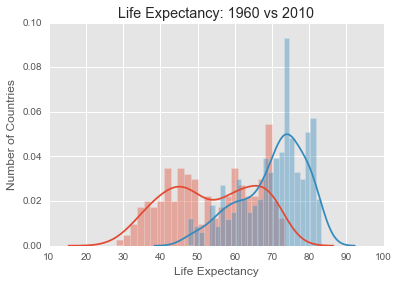

In [35]:
f, (ax1) = plt.subplots(1)
sns.distplot(lexp['1960'].dropna(),hist=True, kde=True, rug=False, bins=25);
sns.distplot(lexp['2010'].dropna(),hist=True, kde=True, rug=False, bins=25);
plt.xlabel('Life Expectancy');
plt.ylabel('Number of Countries');
plt.title('Life Expectancy: 1960 vs 2010')

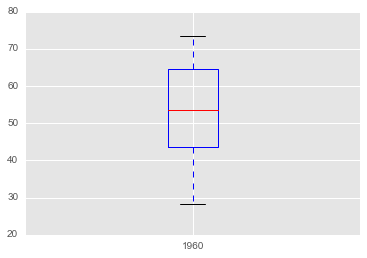

In [36]:
# boxplot using standard pandas and matplotlib
lexp.boxplot(column='1960');

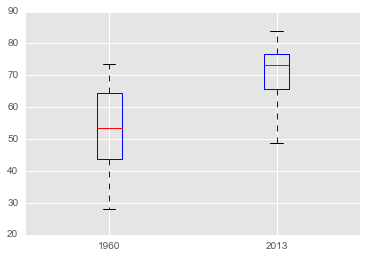

In [37]:
lexp.boxplot(column=['1960','2013']);

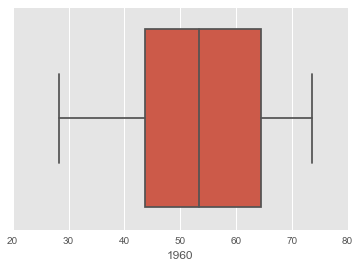

In [38]:
# boxplot of one of the years 
sns.boxplot(x=lexp["1960"])

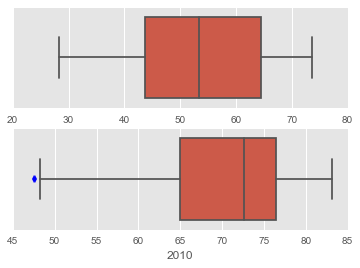

In [39]:
# boxplot comparisons
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(x=lexp["1960"], ax=ax1)
sns.boxplot(x=lexp["2010"], ax=ax2)


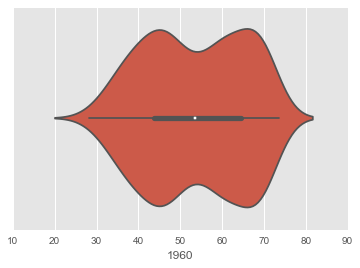

In [41]:
sns.violinplot(lexp['1960'])

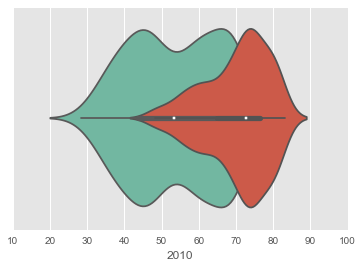

In [40]:
sns.violinplot(lexp['1960'], palette="Set2")
sns.violinplot(lexp['2010'])

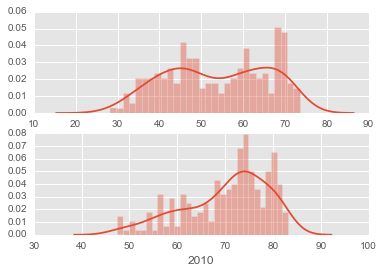

In [45]:
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(lexp['1960'].dropna(),bins=30, ax=ax1)
sns.distplot(lexp['2010'].dropna(),bins=30, ax=ax2)

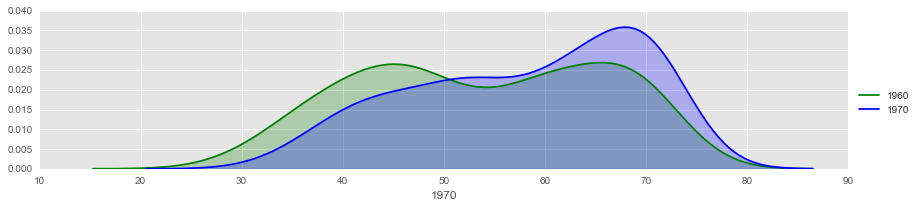

In [46]:
fig = sns.FacetGrid(lexp,aspect=4)
fig.map(sns.kdeplot,'1960',shade=True, color='G')
fig.map(sns.kdeplot,'1970',shade=True, color='b')
#fig.map(sns.kdeplot,'1980',shade=True, color='R')
fig.add_legend()

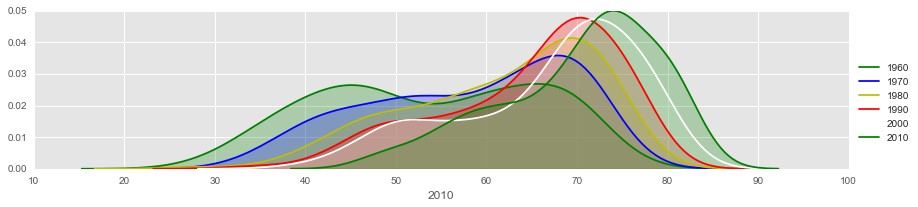

In [47]:
fig = sns.FacetGrid(lexp,aspect=4)
fig.map(sns.kdeplot,'1960',shade=True, color='G')
fig.map(sns.kdeplot,'1970',shade=True, color='B')
fig.map(sns.kdeplot,'1980',shade=True, color='Y')
fig.map(sns.kdeplot,'1990',shade=True, color='R')
fig.map(sns.kdeplot,'2000',shade=True, color='W')
fig.map(sns.kdeplot,'2010',shade=True, color ='G')
#fig.map(sns.kdeplot,'2013',shade=True)
fig.add_legend()

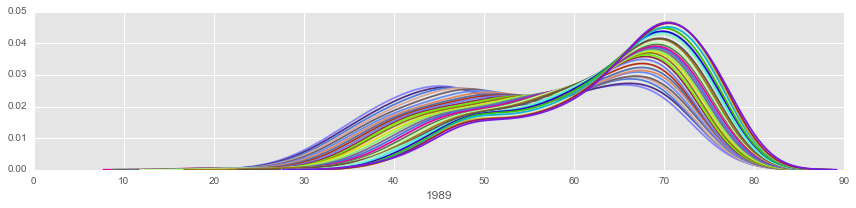

In [48]:
fig = sns.FacetGrid(lexp,aspect=4)
decades = [str(year) for year in range(1960,1990)]
for year in decades:
    fig.map(sns.kdeplot, year, color=np.random.rand(3,1))


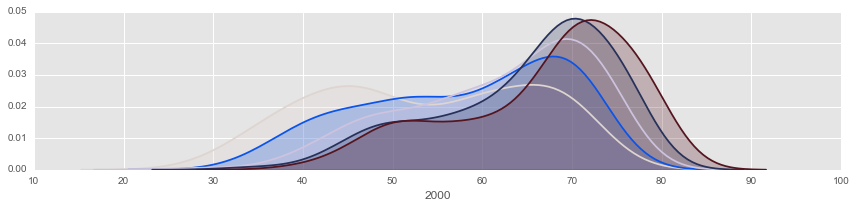

In [49]:
fig = sns.FacetGrid(lexp,aspect=4)
decades = [str(year) for year in range(1960,2010) if year%10==0]
for year in decades:
    fig.map(sns.kdeplot, year, shade= True, color=np.random.rand(3,1))

### Insight and Discovery

In [50]:
#### Look at individual countries

In [51]:
# transform the lexp dataframe 
transform = lexp.T

In [53]:
transform.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293


In [54]:
# drop the code row
transform = transform.ix[1:]

In [55]:
transform.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293
1964,67.0443,NaN,34.0929,34.5903,65.4382,49.1748,56.3926,65.5824,67.5654,NaN,...,61.6071,48.8868,NaN,54.913,51.9695,35.8129,50.5818,41.918,46.5577,52.9717


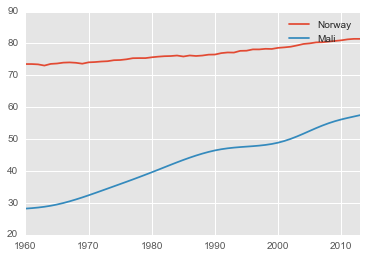

In [70]:
# Norway had highest life expectancy in 1960
transform['Norway'].plot()

# Mali had lowest life expectancy in 1960
transform['Mali'].plot()

plt.legend();

In [73]:
print("Norway Percentage Gain = ", gain['Norway'])
print ("Mali Percentage Gain = ", gain['Mali'])

Norway Percentage Gain =  0.11
Mali Percentage Gain =  1.04


In [75]:
def compare_gains(country1, country2):
    transform[country1].plot()
    transform[country2].plot()
    plt.legend();

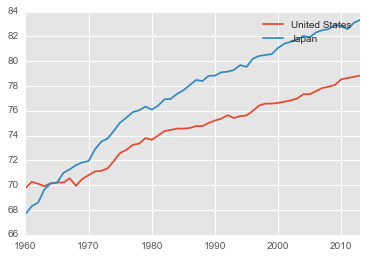

In [76]:
compare_gains('United States', 'Japan')

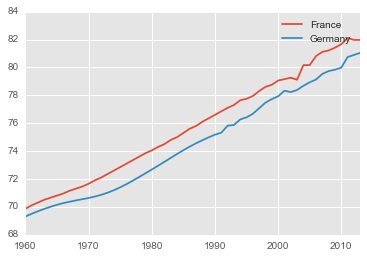

In [77]:
compare_gains('France', 'Germany')

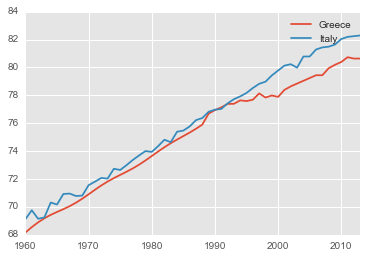

In [80]:
compare_gains('Greece', 'Italy')

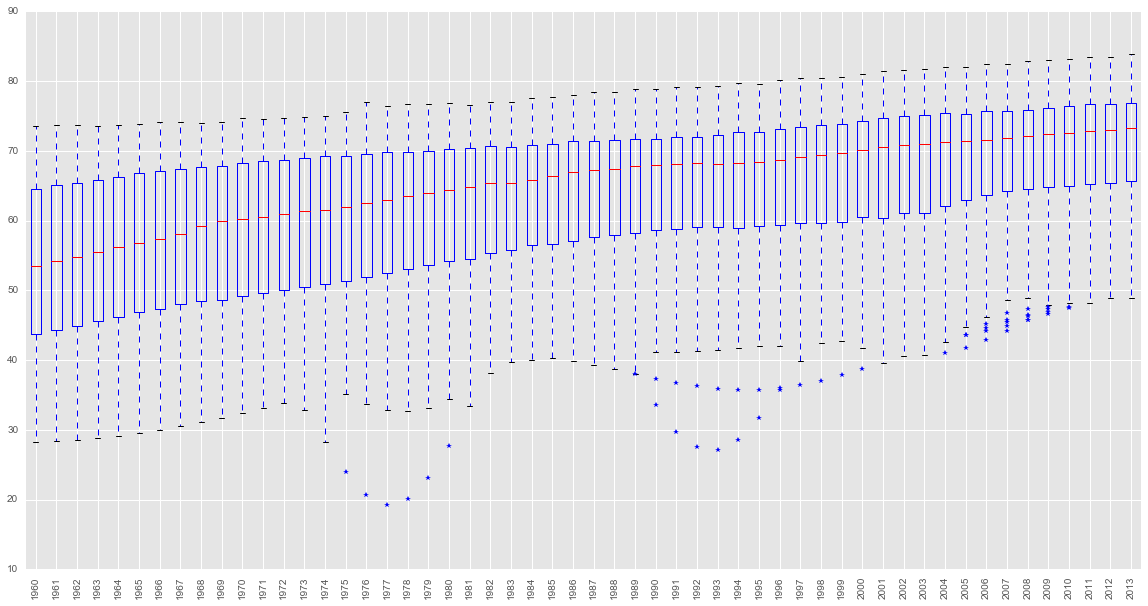

In [85]:
# bird's eye view of LE 
fig = plt.figure(figsize=(20,10), dpi=200)
lexp.boxplot(sym="*");
plt.xticks(rotation='vertical');

In [86]:
lexp['1977'].idxmin()

'Cambodia'

In [87]:
lexp['1993'].idxmin()

'Rwanda'

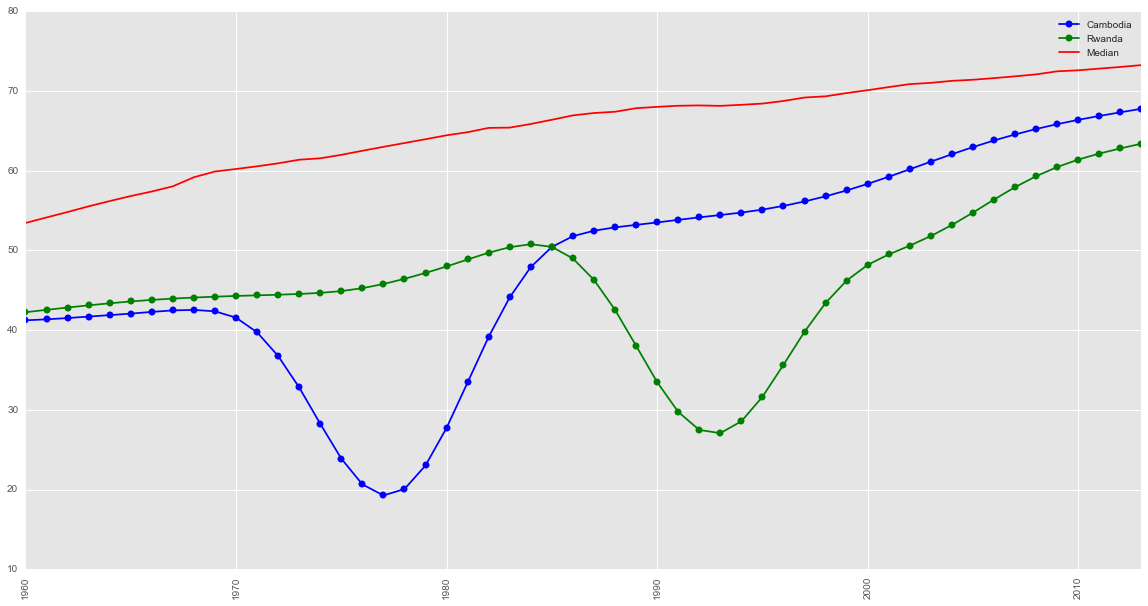

In [88]:
fig = plt.figure(figsize=(20,10), dpi=200)
transform['Cambodia'].plot(marker='o', color='blue');
transform['Rwanda'].plot(marker='o',color='green');
lexp.median().plot(color='red', label='Median');
plt.xticks(rotation='vertical');
plt.legend();

In [ ]:
from ipywidgets import interact 


In [ ]:
years = ['1960','1970','1980','1990','2000','2010']

In [ ]:
def draw_kde(year1,year2):
    fig = sns.FacetGrid(lexp,aspect=4)
    fig.map(sns.kdeplot,year1,shade=True,color='G',legend=True)
    fig.map(sns.kdeplot,year2,shade=True,color='R',legend=True)

In [ ]:
interact(draw_kde, year1=years,year2=years);